Shape of data: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

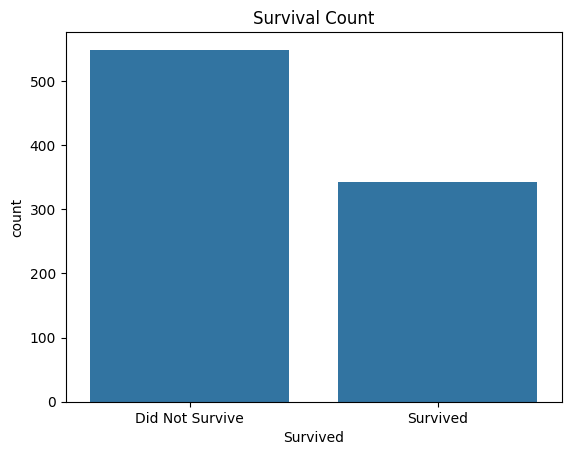

In [16]:
# Titanic Survival Prediction - Step 1: Setup & EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure it's in a 'data/' folder inside your project)
df = pd.read_csv('data/train.csv')

# Basic overview
print("Shape of data:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Visualize survival counts
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.show()



In [17]:
# Step 5: Data Cleaning and Preprocessing (safe version)

# 1. Check missing values again
print(df.isnull().sum())

# 2. Fill missing Age and Embarked safely
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 3. Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

# 4. Drop Ticket and Name (not useful for model)
df.drop(columns=['Ticket', 'Name'], inplace=True)

# 5. Convert Sex and Embarked to numeric using get_dummies
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# 6. Check cleaned data
print("\nCleaned DataFrame:")
print(df.head())

# 7. Confirm all missing values are handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cleaned DataFrame:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500      True   
1            2         1       1  38.0      1      0  71.2833     False   
2            3         1       3  26.0      0      0   7.9250     False   
3            4         1       1  35.0      1      0  53.1000     False   
4            5         0       3  35.0      0      0   8.0500      True   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Par